<a href="https://colab.research.google.com/github/juyounLee/Tensorflow2.0/blob/main/4_3_bostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_y), (test_X, test_y) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
print(train_X.shape)
print(test_X.shape)

(404, 13)
(102, 13)


In [3]:
# standardize the data
# new_data = (data - mean)/(standard deviation)

x_mean = train_X.mean()
x_std = train_X.std()

train_X = (train_X - x_mean) / x_std
test_X = (test_X - x_mean) / x_std


y_mean = train_y.mean()
y_std = train_y.std()

train_y = (train_y - y_mean) / y_std
test_y = (test_y - y_mean) / y_std

print(train_X[0])
print(train_y[0])
print(train_X.shape)
print(test_X.shape)

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157
(404, 13)
(102, 13)


In [4]:
# build the model
import tensorflow as tf

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(units=39, activation='relu'),
                             tf.keras.layers.Dense(units=26, activation='relu'),
                             tf.keras.layers.Dense(units=1)
])

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_X, train_y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 15ms/step - loss: 1.6202 - val_loss: 1.1937
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.9555 - val_loss: 1.2192
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.9154 - val_loss: 1.2886
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.9204 - val_loss: 1.3071
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.9201 - val_loss: 1.2888
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.9212 - val_loss: 1.2542
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.9200 - val_loss: 1.2672
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.9192 - val_loss: 1.2863
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.9204 - val_loss: 1.2622
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.9190 - val_loss: 1.2505
Epoch 11/25
10/10 

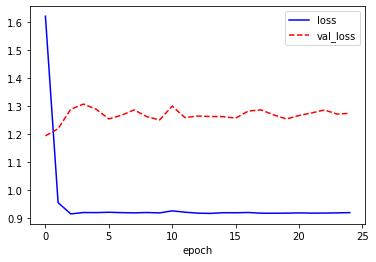

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epoch')
plt.legend()

In [8]:
model.evaluate(test_X, test_y)

4/4 [==============================] - 0s 2ms/step - loss: 1.0071


1.0071306228637695

Text(0, 0.5, 'pred_y')

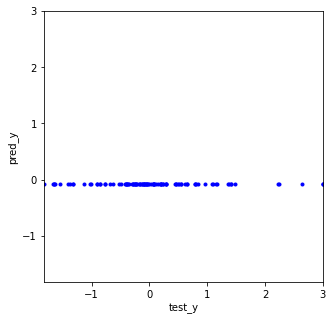

In [9]:
pred_y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_y, pred_y, 'b.')
plt.axis([min(test_y), max(test_y), min(test_y), max(test_y)])
plt.xlabel('test_y')
plt.ylabel('pred_y')

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(units=39, activation='relu'),
                             tf.keras.layers.Dense(units=26, activation='relu'),
                             tf.keras.layers.Dense(units=1)
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 13ms/step - loss: 2.7374 - val_loss: 1.1059
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7579 - val_loss: 1.0835
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.8296 - val_loss: 1.0712
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7592 - val_loss: 1.1459
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6634 - val_loss: 1.0574
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6446 - val_loss: 1.0423
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6569 - val_loss: 1.0524
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6538 - val_loss: 1.0624
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6390 - val_loss: 1.1551


In [12]:
model.evaluate(test_X, test_y)

4/4 [==============================] - 0s 2ms/step - loss: 0.7176


0.71759033203125

Text(0, 0.5, 'pred_y')

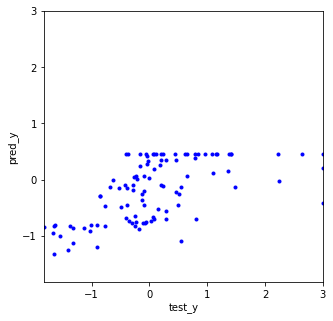

In [13]:
pred_y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_y, pred_y, 'b.')
plt.axis([min(test_y), max(test_y), min(test_y), max(test_y)])
plt.xlabel('test_y')
plt.ylabel('pred_y')